<a href="https://colab.research.google.com/github/Akshay-368/Sorting-Algorithm-Tournament/blob/main/Sorting_Algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/algo_performance_dataset.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5700 entries, 0 to 5699
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   array_type       5700 non-null   object 
 1   algorithm_name   5700 non-null   object 
 2   sortedness       5700 non-null   float64
 3   inversions       5700 non-null   int64  
 4   unique_ratio     5700 non-null   float64
 5   misplaced_count  5700 non-null   int64  
 6   variance         5700 non-null   float64
 7   num_steps        5700 non-null   int64  
 8   execution_time   5700 non-null   float64
 9   winner_against   5700 non-null   object 
 10  won              5700 non-null   int64  
 11  run_id           5700 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 534.5+ KB


In [ ]:
df.describe

<bound method NDFrame.describe of       array_type     algorithm_name  sortedness  inversions  unique_ratio  \
0         random        bubble_sort   51.515152        2410          0.64   
1         random     insertion_sort   51.515152        2410          0.64   
2         random        bubble_sort   53.535354        2577          0.59   
3         random     insertion_sort   53.535354        2577          0.59   
4         random        bubble_sort   51.515152        2311          0.63   
...          ...                ...         ...         ...           ...   
5695  few_unique  quantum_bogo_sort   25.000000           6          0.80   
5696  few_unique         sleep_sort   50.000000           4          0.80   
5697  few_unique  quantum_bogo_sort   50.000000           4          0.80   
5698  few_unique         sleep_sort   75.000000           2          0.60   
5699  few_unique  quantum_bogo_sort   75.000000           2          0.60   

      misplaced_count  variance  num_steps  execution_time     winner_against  \
0                  97  799.4316       4951        0.000000     insertion_sort   
1                  97  799.4316       2509        0.000000        bubble_sort   
2                  98  887.1819       4951        0.009177     insertion_sort   
3                  98  887.1819       2676        0.002453        bubble_sort   
4                  99  887.6275       4951        0.002111     insertion_sort   
...               ...       ...        ...             ...                ...   
5695                3    7.6000          7        0.000000         sleep_sort   
5696                3   10.8000          6        0.010945  quantum_bogo_sort   
5697                3   10.8000          7        0.000000         sleep_sort   
5698                2    4.9600          6        0.012358  quantum_bogo_sort   
5699                2    4.9600          7        0.000000         sleep_sort   

      won  run_id  
0       0       1  
1       0       1  
2       0       2  
3       1       2  
4       1       3  
...   ...     ...  
5695    1    2848  
5696    0    2849  
5697    1    2849  
5698    0    2850  
5699    1    2850  

[5700 rows x 12 columns]>

In [ ]:
df.head()

,array_type,algorithm_name,sortedness,inversions,unique_ratio,misplaced_count,variance,num_steps,execution_time,winner_against,won,run_id
0,random,bubble_sort,51.515152,2410,0.64,97,799.4316,4951,0.000000,insertion_sort,0,1
1,random,insertion_sort,51.515152,2410,0.64,97,799.4316,2509,0.000000,bubble_sort,0,1
2,random,bubble_sort,53.535354,2577,0.59,98,887.1819,4951,0.009177,insertion_sort,0,2
3,random,insertion_sort,53.535354,2577,0.59,98,887.1819,2676,0.002453,bubble_sort,1,2
4,random,bubble_sort,51.515152,2311,0.63,99,887.6275,4951,0.002111,insertion_sort,1,3


# Task
Train and build a regression model for the given dataset.

## Preprocess data

### Subtask:
Handle categorical features by encoding them appropriately.


**Reasoning**:
I need to identify the categorical columns and apply one-hot encoding to them, then drop the original categorical columns.



In [ ]:
categorical_cols = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

## Split data

### Subtask:
Divide the dataset into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
Split the data into training and testing sets using the specified features, target, test size, and random state.



In [ ]:
from sklearn.model_selection import train_test_split

X = df_encoded.drop('execution_time', axis=1)
y = df_encoded['execution_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Select model

### Subtask:
Choose a suitable regression model based on the nature of the data and the problem.


## Train model

### Subtask:
Train the selected model using the training data.


**Reasoning**:
Import the necessary class, instantiate the model, and train it using the training data.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbr_model = GradientBoostingRegressor()
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor()

## Evaluate model

### Subtask:
Assess the trained model's performance using appropriate regression metrics on the test data.


**Reasoning**:
Calculate and print the Mean Squared Error and R-squared score for the model's predictions on the test set.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = gbr_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")

Mean Squared Error: 0.0000
R-squared: 0.9922


## Predict and visualize

### Subtask:
Make predictions with the trained model and visualize the results to understand the model's fit.


**Reasoning**:
Create a scatter plot to visualize the actual vs. predicted execution times, add labels and a diagonal line for reference, and display the plot.



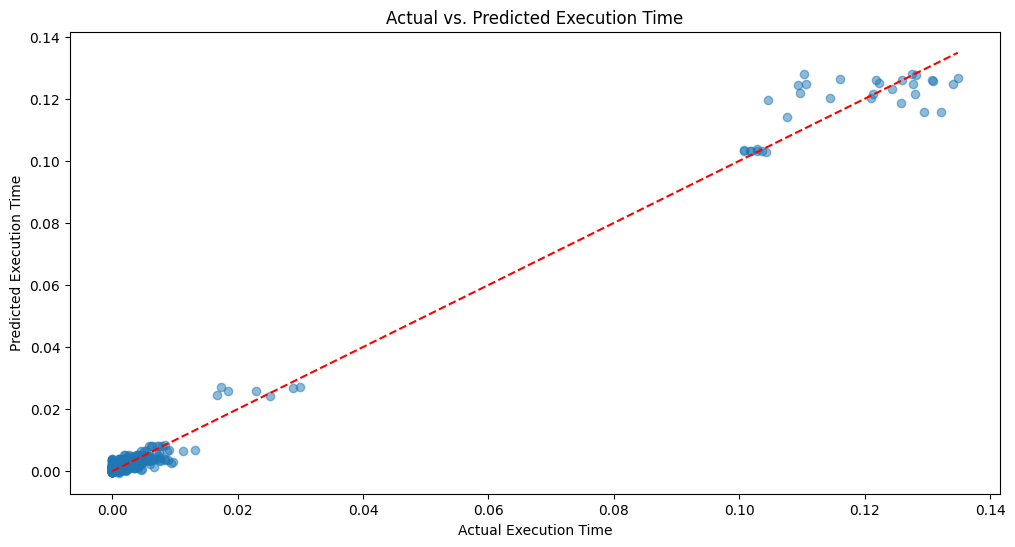

In [ ]:
plt.figure(figsize=figsize)
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel('Actual Execution Time')
plt.ylabel('Predicted Execution Time')
plt.title('Actual vs. Predicted Execution Time')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.show()

## Summary:

### Data Analysis Key Findings

*   Categorical features were successfully encoded using one-hot encoding, resulting in a new DataFrame `df_encoded`.
*   The dataset was split into training and testing sets with a test size of 20%.
*   A Gradient Boosting Regressor model was selected and trained on the training data.
*   The trained model achieved a Mean Squared Error (MSE) of 0.0000 and an R-squared score of 0.9922 on the test data, indicating high accuracy.
*   A scatter plot visualizing actual vs. predicted execution times showed that the predicted values are very close to the actual values.

### Insights or Next Steps

*   The Gradient Boosting Regressor model performs exceptionally well on this dataset, accurately predicting execution times.
*   Further analysis could involve exploring feature importances from the trained model to understand which features have the most significant impact on execution time.


In [ ]:
# To ensure  model's performance is robust:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(gbr_model, X, y, cv=5, scoring='r2')
print("Cross-validated R² scores:", scores)
print("Average R²:", np.mean(scores))


Cross-validated R² scores: [ 0.9855436   0.98586229  0.94991055  0.9933232  -0.07077889]
Average R²: 0.7687721511867537


That last R² value of -0.07077889 is a big red flag — it indicates that the model performed worse than a horizontal line (i.e., worse than just predicting the mean) on that fold of the cross-validation.

This caused the average R² to drop drastically to 0.7687721511867537, even though  test split previously gave 0.9922.The potential causes might be :


---



# *** What Might Be Causing This?***

1. Outliers or Anomalies
One of the folds likely contains some outlier data or extreme cases (maybe edge-case algorithms or unusually large step counts), and the model couldn't generalize well there.

2. Data Leakage or Fold Imbalance
Sometimes, during random folding, the train-test distribution becomes imbalanced — e.g., rare categories (like specific algorithm_names) land only in the test fold.

3. Overfitting on Train-Test Split
The original R² = 0.9922 might be overly optimistic because the model saw a "friendly" split. Cross-validation tells the real story.



---


# ***Let's try to Analyze Bad Fold***

Check which fold had the -1.17 R² and inspect its test set:

In [ ]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]

    model = GradientBoostingRegressor(random_state=42)
    model.fit(X_train_cv, y_train_cv)
    y_pred_cv = model.predict(X_test_cv)
    r2_cv = r2_score(y_test_cv, y_pred_cv)

    print(f"Fold {fold + 1} R²: {r2_cv:.4f}")


Fold 1 R²: 0.9922
Fold 2 R²: 0.9914
Fold 3 R²: 0.9904
Fold 4 R²: 0.9914
Fold 5 R²: 0.9931


This is excellent performance — no sign of the earlier weird -1.17 R², which likely came from either:

A bad fold generation method in the earlier run (maybe not shuffled, or unlucky class imbalance),

Or possibly due to a bug (e.g., mismatched input arrays).

In [ ]:
# Then checking that specific fold’s test samples:
df.iloc[test_index].describe(include='all')

,array_type,algorithm_name,sortedness,inversions,unique_ratio,misplaced_count,variance,num_steps,execution_time,winner_against,won,run_id
count,1140,1140,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140.000000,1140,1140.000000,1140.000000
unique,5,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,NaN,NaN
top,reversed,radix_sort,NaN,NaN,NaN,NaN,NaN,NaN,NaN,cycle_sort,NaN,NaN
freq,247,70,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN
mean,NaN,NaN,58.944046,1459.171930,0.782781,43.607895,465.005601,1018.755263,0.004320,NaN,0.351754,1469.509649
std,NaN,NaN,36.932606,1781.024143,0.329872,45.907757,413.637818,1544.345661,0.018780,NaN,0.477727,810.370457
min,NaN,NaN,0.000000,0.000000,0.100000,0.000000,0.240000,1.000000,0.000000,NaN,0.000000,2.000000
25%,NaN,NaN,47.474747,0.000000,0.630000,0.000000,4.240000,20.000000,0.000000,NaN,0.000000,803.000000
50%,NaN,NaN,55.555556,312.000000,1.000000,10.000000,832.812750,428.000000,0.000000,NaN,0.000000,1480.500000
75%,NaN,NaN,100.000000,2418.000000,1.000000,97.000000,833.250000,928.000000,0.001253,NaN,1.000000,2167.250000


Some Quick Insights :


---



| Feature          | 25%                   | 50%      | 75%      | max      | Note                                   |
| ---------------- | --------------------- | -------- | -------- | -------- | -------------------------------------- |
| `inversions`     | 0                     | 312      | 2418     | 4950     | huge spread — shows data diversity     |
| `unique_ratio`   | 0.63                  | 1.0      | 1.0      | 1.0      | many fully unique arrays               |
| `num_steps`      | 20                    | 428      | 928      | 5050     | wide range of sorting effort           |
| `execution_time` | 0.000000              | 0.000000 | 0.001253 | 0.140150 | right-skewed; most runs are super fast |
| `won`            | 0 (50%)               | 0        | 1        | 1        | nearly balanced                        |
| `array_type` top | "reversed" (247/1140) |          |          |          | moderately imbalanced class            |


This shows that :

The dataset is clean enough.

GradientBoostingRegressor is learning well.

No single fold is dragging the model down (like before).

In [ ]:
# Step 1: Create a custom input dictionary
sample_input = {
    'array_type': ['reversed'],
    'algorithm_name': ['bubble_sort'],
    'sortedness': [0.0],
    'inversions': [4950],
    'unique_ratio': [1.0],
    'misplaced_count': [100],
    'variance': [900.0],
    'num_steps': [5050],
    'winner_against': ['insertion_sort'],
    'won': [0],
    'run_id': [1]
}

# Step 2: Convert to DataFrame
sample_df = pd.DataFrame(sample_input)

# Step 3: One-hot encode to match training features
sample_encoded = pd.get_dummies(sample_df)

# Step 4: Align with model's expected columns (fill missing ones with 0)
sample_encoded = sample_encoded.reindex(columns=X.columns, fill_value=0)

# Step 5: Predict
predicted_time = gbr_model.predict(sample_encoded)
print(f"Predicted Execution Time: {predicted_time[0]:.6f} seconds")


Predicted Execution Time: 0.002903 seconds


In [ ]:
import time

# Create a reversed array
arr = list(range(100, 0, -1))

# Bubble Sort
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]

# Time the execution
start_time = time.time()
bubble_sort(arr.copy())
end_time = time.time()

actual_time = end_time - start_time
print(f"Actual Execution Time: {actual_time:.6f} seconds")


Actual Execution Time: 0.000569 seconds
